In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
df=pd.read_csv('D:/dataset1/titanic_train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking for any null values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
df["Age"].fillna(df.groupby("Sex")["Age"].transform("median"), inplace=True)

In [8]:
df=df.fillna(0)

# Univariate Analysis

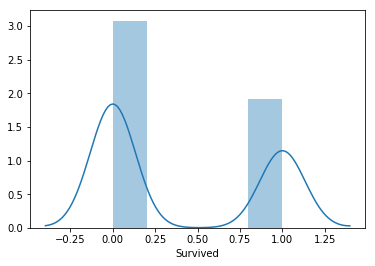

In [9]:
sns.distplot(df['Survived'])
plt.show()

In [10]:
df.Survived.value_counts().head()

0    549
1    342
Name: Survived, dtype: int64

# Bivariate Analysis

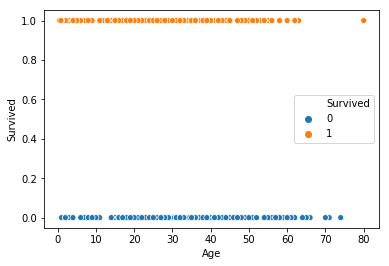

In [11]:
sns.scatterplot(x='Age', y='Survived', hue='Survived', data=df)

In [12]:
#Gender associated with survival
df.groupby(['Sex']).agg({'Survived': 'sum'}).sort_values(by= 'Survived', ascending = False).head()

,Survived
Sex,
female,233
male,109


In [13]:
df.groupby(['Sex']).agg({'Survived': 'mean'}).sort_values(by= 'Survived', ascending = False).head()

,Survived
Sex,
female,0.742038
male,0.188908


# Heatmap

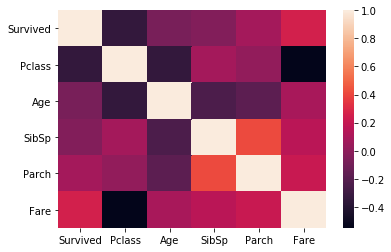

In [14]:
df1=df.drop(['PassengerId'], axis=1)
heat_map = sns.heatmap(df1.corr())

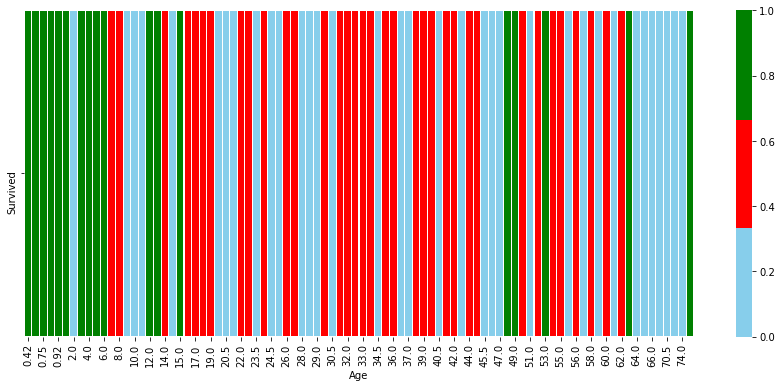

In [15]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(df,columns='Age',values=["Survived"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

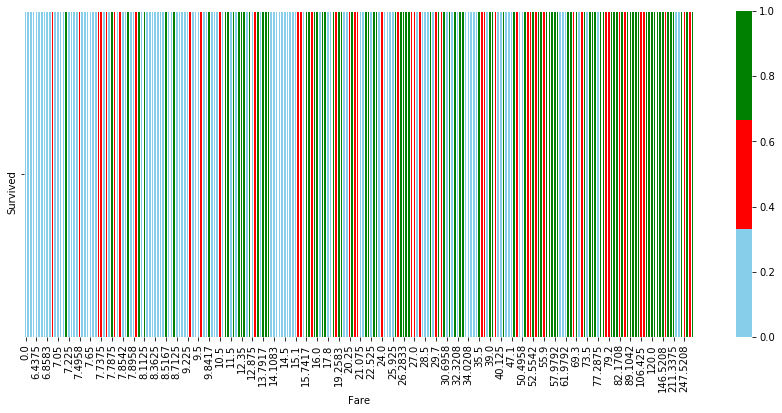

In [16]:
plt.figure(figsize=(15,6))
h=pd.pivot_table(df,columns='Fare',values=["Survived"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

# Removing outliers

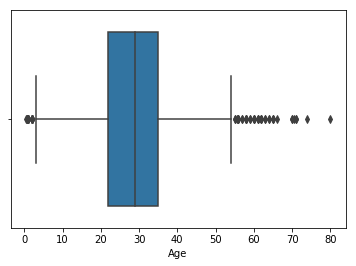

In [17]:
sns.boxplot(df['Age'])

In [18]:
from scipy import stats
z = np.abs(stats.zscore(df['Age']))
df = df[(z < 3)] #outliers with z-score >3 are removed

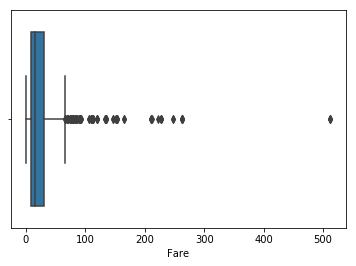

In [19]:
sns.boxplot(df['Fare'])

In [20]:
z = np.abs(stats.zscore(df['Fare']))
df = df[(z < 3)] #outliers with z-score >3 are removed

In [21]:
df.shape

(864, 12)

# One-hot enocoding

In [22]:
#One hot encoding
Feature = df[['Pclass','Age','Fare','Sex','Cabin']]
Feature = pd.concat([Feature,pd.get_dummies(df['Sex'],df['Cabin'])], axis=1)
Feature.drop(['Sex'], axis=1, inplace=True)
Feature.drop(['Cabin'], axis=1, inplace=True)
Feature.head()

,Pclass,Age,Fare,"0 0 1 C85 2 0 3 C123 4 0 5 0 6 E46 7 0 8 0 9 0 10 G6 11 C103 12 0 13 0 14 0 15 0 16 0 17 0 18 0 19 0 20 0 21 D56 22 0 23 A6 24 0 25 0 26 0 28 0 29 0 30 0 ... 861 0 862 D17 863 0 864 0 865 0 866 0 867 A24 868 0 869 0 870 0 871 D35 872 B51 B53 B55 873 0 874 0 875 0 876 0 877 0 878 0 879 C50 880 0 881 0 882 0 883 0 884 0 885 0 886 0 887 B42 888 0 889 C148 890 0 Name: Cabin, Length: 864, dtype: object_female","0 0 1 C85 2 0 3 C123 4 0 5 0 6 E46 7 0 8 0 9 0 10 G6 11 C103 12 0 13 0 14 0 15 0 16 0 17 0 18 0 19 0 20 0 21 D56 22 0 23 A6 24 0 25 0 26 0 28 0 29 0 30 0 ... 861 0 862 D17 863 0 864 0 865 0 866 0 867 A24 868 0 869 0 870 0 871 D35 872 B51 B53 B55 873 0 874 0 875 0 876 0 877 0 878 0 879 C50 880 0 881 0 882 0 883 0 884 0 885 0 886 0 887 B42 888 0 889 C148 890 0 Name: Cabin, Length: 864, dtype: object_male"
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


# Modeling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [25]:
#set seed for reproducibility
seed = 4
np.random.seed(seed)

In [26]:
#define model with 3 hidden layers of 10 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=5))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')


In [27]:
#split dataset in target values and features
X=Feature.iloc[:,:]
y=df['Survived'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=seed)


In [29]:
import warnings
warnings.filterwarnings("ignore")
scaler = StandardScaler()
# fit scaler with train data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train model
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
604/604 [==============================] - 0s 316us/step - loss: 0.7994
Epoch 2/100
604/604 [==============================] - 0s 66us/step - loss: 0.5266
Epoch 3/100
604/604 [==============================] - 0s 65us/step - loss: 0.3862
Epoch 4/100
604/604 [==============================] - 0s 66us/step - loss: 0.3031
Epoch 5/100
604/604 [==============================] - 0s 63us/step - loss: 0.2502
Epoch 6/100
604/604 [==============================] - 0s 70us/step - loss: 0.2186
Epoch 7/100
604/604 [==============================] - 0s 63us/step - loss: 0.2024
Epoch 8/100
604/604 [==============================] - 0s 71us/step - loss: 0.1925
Epoch 9/100
604/604 [==============================] - 0s 63us/step - loss: 0.1833
Epoch 10/100
604/604 [==============================] - 0s 76us/step - loss: 0.1758
Epoch 11/100
604/604 [==============================] - 0s 74us/step - loss: 0.1717
Epoch 12/100
604/604 [==============================] - 0s 70us/step - loss: 0.1666


In [34]:
#perform evaluation on train and test set
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)

print('MSE on train set = {}'.format(MSE_train))
print('MSE on test set = {}'. format(MSE_test))

MSE on train set = 0.12137932451298175
MSE on test set = 0.13765275725988896


In [35]:
model.save("Titanic")